# PyTorch를 사용해 신경망 정의하기

* 딥러닝은 인공신경망(models)을 사용하며 이것은 상호 연결된 집단의 많ㅎ은 계층으로 구성된 계산 시스템이다.
* 데이터가 ㅇ이 상호 연결된 집단을 통과하면서, 신경망은 입력을 출력으로 바꾸기 위해 요구된 계산방법에 대한 정보를 학습한다.
* PyTorch에서, 신경망은 `torch.nn`패키지를 이용해 구성할 수 있다.

## 소개

* `PyTorch`는 `torch.nn`을 포함하여 신경망을 구축하는데 필요한 모든 도구를 제공한다.
* `nn.Module`은 계층과 출력을 반환하는 `forward(input)` 메소드를 포함하고 있다.

## 1 데이터를 가져오기 위해 필요한 라이브러리 불러오기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## 2 신경망을 정의하고 초기화하기

이미지를 인식하는 신경망을 구축해보자. PyTorch에서 만들어진 합성곱(convolutional neural network)을 사용한다. 합성곱은 커널이나 작은 행렬(matrix)를 통해 가중치를 부여한 이미지의 각 요소를 주변 값과 더한다. 그리고 이미지의 특징을 추출한다.

합성곱을 사용해, 1개의 입력 이미지 채널을 가지고 목표인 0~9까지의 숫자를 나타내는 10개의 클래스를 가진다.

In [2]:
class CNN10ClassifierNet(nn.Module):
  def __init__(self):
    super(CNN10ClassifierNet, self).__init__()
    
    # 첫번째 2D 합성곱 층
    # 1개의 입력 채널(이미지)을 받아들이고, 사각 커널 사이즈가 3인 32개의 합성곱 특징을 출력한다.
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    
    # 두번째 2D 합성곱 층
    # 32개의 입력 채널을 받아들이고, 사각 커널 사이즈가 3인 64개의 합성곱 특징을 출력한다.
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    
    # Dropout
    # 인접한 필셀들은 입력 확률에 따라 모두 0 값을 가지거나 혹은 모두 유효한 값이 되도록 만든다.
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    
    # 첫번째 완전 연결 층
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 10)
    
net = CNN10ClassifierNet()
print(net)
    

CNN10ClassifierNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 3 데이터가 모델을 어떻게 지나갈 지 구체화하기

PyTorch 

In [3]:
class CNN10ClassifierNet(nn.Module):
  def __init__(self):
    super(CNN10ClassifierNet, self).__init__()
    
    # 첫번째 2D 합성곱 층
    # 1개의 입력 채널(이미지)을 받아들이고, 사각 커널 사이즈가 3인 32개의 합성곱 특징을 출력한다.
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    
    # 두번째 2D 합성곱 층
    # 32개의 입력 채널을 받아들이고, 사각 커널 사이즈가 3인 64개의 합성곱 특징을 출력한다.
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    
    # Dropout
    # 인접한 필셀들은 입력 확률에 따라 모두 0 값을 가지거나 혹은 모두 유효한 값이 되도록 만든다.
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    
    # 첫번째 완전 연결 층
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 10)
    
  def forward(self, x):
    # 데이터가 conv1을 통과한다.
    x = self.conv1(x)
    # x를 ReLU 활성함수(rectified linear activation function)에 대입한다.
    x = F.relu(x)
    
    x = self.conv2(x)
    x = F.relu(x)
    
    # x에 대해서 max pooling을 실행한다.
    x = F.max_pool2d(x, 2)
    # 데이터가 dropout1을 통과한다.
    x = self.dropout1(x)
    # start_dim=1로 x를 압축한다.
    x = torch.flatten(x, 1)
    # 데이터가 fc1을 통과한다.  
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    
    # x에 대해서 softmax를 실행한다.
    output = F.log_softmax(x, dim=1)
    return output
    
net = CNN10ClassifierNet()
print(net)

CNN10ClassifierNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [5]:
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())
    
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([32, 1, 3, 3])
conv1.bias 	 torch.Size([32])
conv2.weight 	 torch.Size([64, 32, 3, 3])
conv2.bias 	 torch.Size([64])
fc1.weight 	 torch.Size([128, 9216])
fc1.bias 	 torch.Size([128])
fc2.weight 	 torch.Size([10, 128])
fc2.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5, 6, 7]}]


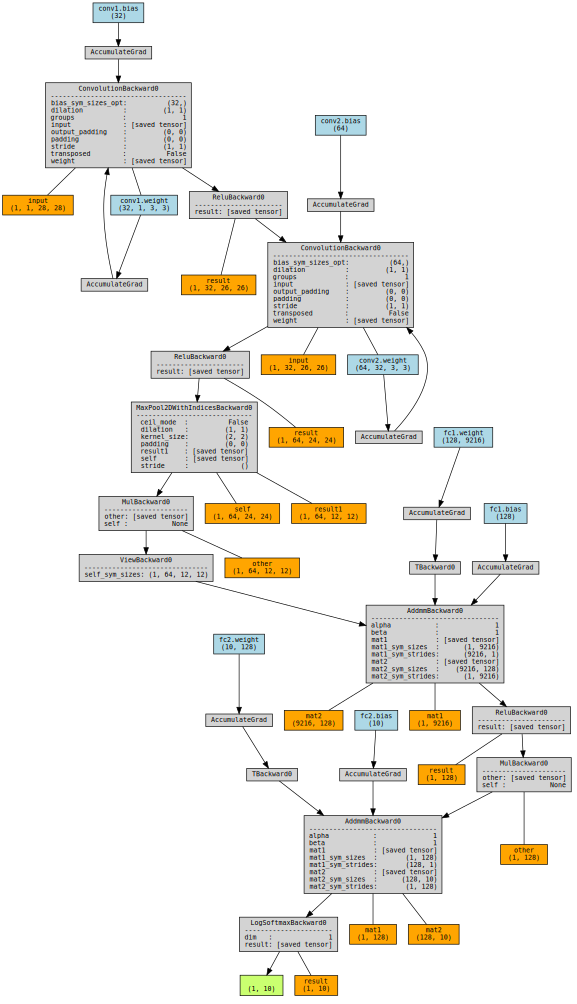

In [9]:
from torchviz import make_dot
random_data = torch.randn(1, 1, 28, 28)
result = net(random_data)
make_dot(
  net(random_data),
  params=dict(net.named_parameters()),
  show_attrs=True,
  show_saved=True
  )

In [ ]:
print(result)

tensor([[-2.3574, -2.2093, -2.3760, -2.3729, -2.3430, -2.1875, -2.1434, -2.2874,
         -2.2643, -2.5448]], grad_fn=<LogSoftmaxBackward0>)


In [7]:
!pip install torchsummary